<a href="https://colab.research.google.com/github/Dan5049/MPC-MLF/blob/main/cv07/Lab_07_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.datasets import cifar10
from keras.utils import to_categorical
import math as math

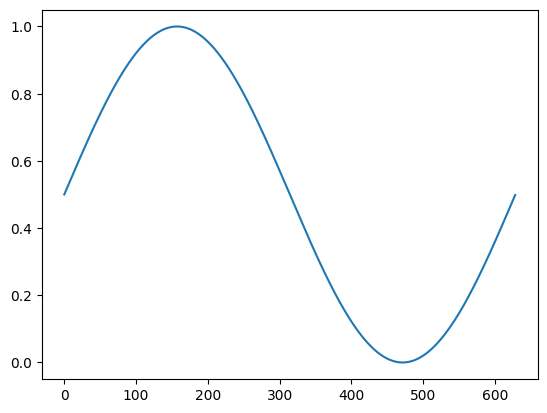

In [97]:
x = np.arange(0, 2*math.pi, 0.01)
mysin = (np.sin(x) + 1) / 2

#x = np.expand_dims(x, -1)
#mysin = np.expand_dims(mysin, -1)

plt.figure()
plt.plot(mysin)
plt.show()


In [98]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.summary()

optimizer = SGD(learning_rate = 0.1)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
#model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(x, mysin, epochs=50, batch_size=1, validation_split = 0.2, verbose=1)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 10)                20        
                                                                 
 dense_81 (Dense)            (None, 5)                 55        
                                                                 
 dense_82 (Dense)            (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
503/503 [==============================] - 2s 3ms/step - loss: 0.0523 - mean_squared_error: 0.0523 - val_loss: 0.0991 - val_mean_squared_error: 0.0991
Epoch 2/50
503/503 [==============================] - 2s 3ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.1113 - val_mean_squared_error: 0.11

20/20 [==============================] - 0s 1ms/step


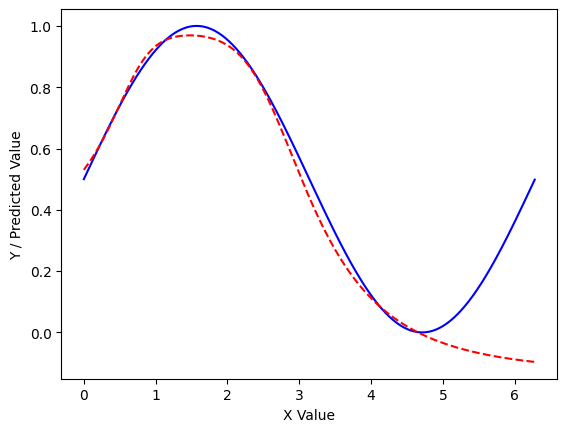

In [99]:
preds = model.predict(x)
plt.plot(x, mysin, 'b', x, preds, 'r--')
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.show()